# Data Preprocessing and Feature Engineering

## Imports

In [1]:
import preprocessing as prep
import numpy as np
import pandas as pd
import nltk
import string
import pickle
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarni

In [2]:
df = pd.read_csv('../data/raw.csv', encoding='latin1')

In [3]:
df.columns = ['tweet', 'product', 'emotion']

In [4]:
df.head(20)

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


"tweet" is my independent variable, "emotion" is the label. Next, I look to see if any elements are unlabeled.

In [5]:
df['emotion'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [6]:
df = df[df['emotion']!="I can't tell"]
df['emotion'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
Name: emotion, dtype: int64

In [7]:
df['tweet'].isna().sum()

1

In [8]:
df.dropna(axis=0, subset=['tweet'], inplace=True)

In [9]:
df['product'].value_counts()

iPad                               942
Apple                              659
iPad or iPhone App                 470
Google                             429
iPhone                             296
Other Google product or service    292
Android App                         81
Android                             78
Other Apple product or service      35
Name: product, dtype: int64

In [10]:
df['product'].isna().sum()

5654

More than half of the data in this field are null, and they're quite spread out too, so I'm choosing to forgo further analysis of this field for now. Moving on, I begin to tokenize each of the reviews.

In [11]:
X = df['tweet']
y = df['emotion']

In [12]:
X = [word_tokenize(x) for x in X]

In [13]:
X[0]

['.',
 '@',
 'wesley83',
 'I',
 'have',
 'a',
 '3G',
 'iPhone',
 '.',
 'After',
 '3',
 'hrs',
 'tweeting',
 'at',
 '#',
 'RISE_Austin',
 ',',
 'it',
 'was',
 'dead',
 '!',
 'I',
 'need',
 'to',
 'upgrade',
 '.',
 'Plugin',
 'stations',
 'at',
 '#',
 'SXSW',
 '.']

In [14]:
stopwords_list = stopwords.words('english') + ['sxsw']
stopwords_list += list(string.punctuation[1:])

## Train-Validation-Test Split

In [15]:
X_train, X_test, y_train, y_test = prep.split(df, int(len(df)*.15))

In [16]:
pd.concat([X_train, y_train], axis=1)

,tweet,emotion
3202,Saw juan from juan in a million at google hotp...,No emotion toward brand or product
512,Good news for Austin-bound Apple fanboys: {lin...,Positive emotion
2936,Wew RT @mention #android app Bizzy challenges ...,No emotion toward brand or product
278,#technews Apple Opening Pop-Up Store In Austin...,No emotion toward brand or product
4772,&quot;@mention Google to Launch Major New Soci...,No emotion toward brand or product
...,...,...
5837,RT @mention Google Latitude Check-ins Follow F...,No emotion toward brand or product
5285,RT @mention #sxsw bound! Keep an eye out I may...,Positive emotion
5488,RT @mention Are you at #sxsw? Check out #Tokii...,No emotion toward brand or product
873,"Come find me at the @mention booth, I have 2 @...",No emotion toward brand or product


In [17]:
X_train, X_train_val, y_train, y_train_val = prep.split(pd.concat([X_train, y_train], axis=1), int(len(df)*.15))

In [18]:
X_train = list(map(prep.preprocess, list(X_train)))
X_train_val = list(map(prep.preprocess, list(X_train_val)))
X_test = list(map(prep.preprocess, list(X_test)))

In [19]:
X_train[0]

'win ipad 2 submit amp vote favorite quote link link'

Next, I use tf-idf to vectorize the reviews.

## TF-IDF Vectorization and tSVD

In [20]:
vectorizer = TfidfVectorizer()
tfidf_X_train = vectorizer.fit_transform(X_train)
tfidf_X_train_val = vectorizer.transform(X_train_val)
tfidf_X_test = vectorizer.transform(X_test)

In [21]:
tfidf_X_train.shape

(6256, 8316)

In [22]:
tfidf_X_train_val.shape

(1340, 8316)

In [23]:
tfidf_X_test.shape

(1340, 8316)

For turning my labels––positive, negative, and no emotion––into numeric values, I've decided to make positive = 2, no emotion = 1, and negative emotion = 0. My reason for doing so is to make the distance between positive and negative reviews as big as possible so that my model's metrics penalize that misclassification, "positive" for "negative" or vice versa, more strongly than if either had simply been mistaken as "no emotion". It seems a mild error to mistakenly classifiy a positive review as having no emotion, or a review without emotion as being positive. A similar relationship exists between "no emotion" and "negative." These sorts of errors I would consider mild in this context. The more serious error is mistaking a positive review for a negative one, or vice versa, and encoding the labels this way will help accuracy/precision/recall/F1 metrics evaluate predictions accordingly.

In [24]:
y_train = prep.sentiment_encoder(y_train)
y_train_val = prep.sentiment_encoder(y_train_val)
y_test = prep.sentiment_encoder(y_test)
y_train[:10]

[1, 1, 1, 2, 2, 2, 1, 1, 1, 1]

In [25]:
with open("../data/y_train.txt", "wb") as fp:
    pickle.dump(y_train, fp)
    
with open("../data/y_train_val.txt", "wb") as fp:
    pickle.dump(y_train_val, fp)
    
with open("../data/y_test.txt", "wb") as fp:
    pickle.dump(y_test, fp)

In [26]:
tsvd = TruncatedSVD(4000)
tsvd.fit(tfidf_X_train)

TruncatedSVD(n_components=4000)

95% explained variance down to 2891 dimensions.


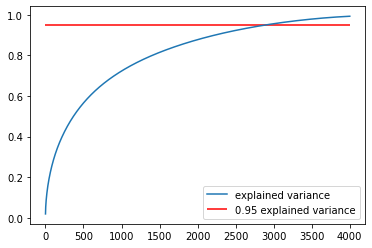

In [27]:
explained_var = tsvd.explained_variance_ratio_.cumsum()
ideal_dim = 4000 - len(explained_var[explained_var >= 0.95]) + 1
print(f'95% explained variance down to {ideal_dim} dimensions.')

dims = np.arange(1, 4001)
plt.plot(dims, tsvd.explained_variance_ratio_.cumsum(), label='explained variance')
plt.hlines(0.95, xmin=0, xmax=4000, colors='red', label='0.95 explained variance')
plt.legend()

Looks like 95% of explained variance is preserved down to ~3000 dimensions. That's a big improvement from the previous ~8000 dimensions, so I'll make that my cutoff.

In [28]:
tsvd = TruncatedSVD(ideal_dim)
svd_X_train = tsvd.fit_transform(tfidf_X_train)
svd_X_train_val = tsvd.transform(tfidf_X_train_val)
svd_X_test = tsvd.transform(tfidf_X_test)

In [29]:
with open("../data/X_train.txt", "wb") as fp:
    pickle.dump(svd_X_train, fp)
    
with open("../data/X_train_val.txt", "wb") as fp:
    pickle.dump(svd_X_train_val, fp)
    
with open("../data/X_test.txt", "wb") as fp:
    pickle.dump(svd_X_test, fp)

## SMOTE

In [30]:
smote = SMOTE(random_state=42)
smote_svd_X_train , smote_y_train = smote.fit_resample(svd_X_train, y_train)

/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [31]:
with open("../data/smote_X_train.txt", "wb") as fp:
    pickle.dump(smote_svd_X_train, fp)

with open("../data/smote_y_train.txt", "wb") as fp:
    pickle.dump(smote_y_train, fp)

## TF-IDF and tSVD on Unigrams and Bigrams

In [32]:
bigram_vectorizer = TfidfVectorizer(ngram_range=(1,2))
bigram_X_train = bigram_vectorizer.fit_transform(X_train)
bigram_X_train_val = bigram_vectorizer.transform(X_train_val)
bigram_X_test = bigram_vectorizer.transform(X_test)

95% explained variance down to 4150 dimensions.


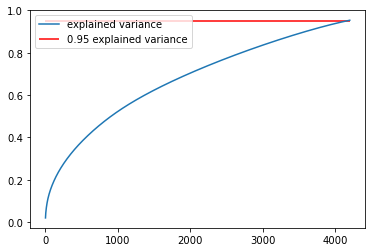

In [33]:
maxd = 4200
tsvd = TruncatedSVD(maxd)
tsvd.fit(bigram_X_train)

explained_var = tsvd.explained_variance_ratio_.cumsum()
ideal_dim = maxd - len(explained_var[explained_var >= 0.95]) + 1
print(f'95% explained variance down to {ideal_dim} dimensions.')

dims = np.arange(1, maxd+1)
plt.plot(dims, tsvd.explained_variance_ratio_.cumsum(), label='explained variance')
plt.hlines(0.95, xmin=0, xmax=maxd, colors='red', label='0.95 explained variance')
plt.legend()

In [34]:
tsvd = TruncatedSVD(ideal_dim)
bigram_X_train = tsvd.fit_transform(tfidf_X_train)
bigram_X_train_val = tsvd.transform(tfidf_X_train_val)
bigram_X_test = tsvd.transform(tfidf_X_test)

In [35]:
with open("../data/bigram_X_train.txt", "wb") as fp:
    pickle.dump(bigram_X_train, fp)
    
with open("../data/bigram_X_train_val.txt", "wb") as fp:
    pickle.dump(bigram_X_train_val, fp)
    
with open("../data/bigram_X_test.txt", "wb") as fp:
    pickle.dump(bigram_X_test, fp)

## SMOTE on Unigrams and Bigrams

In [36]:
smote = SMOTE(random_state=42)
smote_bigram_X_train , smote_bigram_y_train = smote.fit_resample(bigram_X_train, y_train)

/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
with open("../data/smote_bigram_X_train.txt", "wb") as fp:
    pickle.dump(smote_bigram_X_train, fp)

with open("../data/smote_bigram_y_train.txt", "wb") as fp:
    pickle.dump(smote_bigram_y_train, fp)